# 라이브러리 호출

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')

# 시도 및 장애유형별 장애인 데이터

In [2]:
# 파일 호출 및 필요한 컬럼 조회
file_path = './원본데이터/시도별_장애유형별_장애등급별_성별_등록장애인수_20220622104634.csv'
df = pd.read_csv(file_path,
                  encoding = 'euc-kr',
                  header = 2)
df = df.iloc[:,0:4]
df

,시도별(1),장애유형별(1),장애유형별(2),계
0,전국,합계,소계,2545637
1,전국,지체,소계,1254130
2,전국,시각,소계,252632
3,전국,청각ㆍ언어,청각,302003
4,전국,청각ㆍ언어,언어,20321
...,...,...,...,...
283,제주도,호흡기,소계,246
284,제주도,간,소계,161
285,제주도,안면,소계,23
286,제주도,장루ㆍ요루,소계,179


In [3]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시도별(1)    288 non-null    object
 1   장애유형별(1)  288 non-null    object
 2   장애유형별(2)  288 non-null    object
 3   계         288 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 9.1+ KB


In [4]:
# 이상치 확인
df.describe()

,계
count,2.880000e+02
mean,3.535607e+04
std,1.751963e+05
min,1.400000e+01
25%,4.650000e+02
50%,2.712500e+03
75%,1.388900e+04
max,2.545637e+06


In [5]:
# 중복값 확인
df.duplicated().sum()

0

In [6]:
# 장애유형 == 청각ㆍ언어 각각 분리
for i in range(len(df)):
    if df['장애유형별(2)'][i] == '청각':
        df['장애유형별(1)'][i] = '청각'
df

C:\Users\admin\AppData\Local\Temp\ipykernel_7504\822976233.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['장애유형별(1)'][i] = '청각'


,시도별(1),장애유형별(1),장애유형별(2),계
0,전국,합계,소계,2545637
1,전국,지체,소계,1254130
2,전국,시각,소계,252632
3,전국,청각,청각,302003
4,전국,청각ㆍ언어,언어,20321
...,...,...,...,...
283,제주도,호흡기,소계,246
284,제주도,간,소계,161
285,제주도,안면,소계,23
286,제주도,장루ㆍ요루,소계,179


In [7]:
for i in range(len(df)):
    if df['장애유형별(2)'][i] == '언어':
        df['장애유형별(1)'][i] = '언어'
df

C:\Users\admin\AppData\Local\Temp\ipykernel_7504\262061019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['장애유형별(1)'][i] = '언어'


,시도별(1),장애유형별(1),장애유형별(2),계
0,전국,합계,소계,2545637
1,전국,지체,소계,1254130
2,전국,시각,소계,252632
3,전국,청각,청각,302003
4,전국,언어,언어,20321
...,...,...,...,...
283,제주도,호흡기,소계,246
284,제주도,간,소계,161
285,제주도,안면,소계,23
286,제주도,장루ㆍ요루,소계,179


In [8]:
# 소계컬럼 삭제
df = df.iloc[:,[0,1,3]]
df

,시도별(1),장애유형별(1),계
0,전국,합계,2545637
1,전국,지체,1254130
2,전국,시각,252632
3,전국,청각,302003
4,전국,언어,20321
...,...,...,...
283,제주도,호흡기,246
284,제주도,간,161
285,제주도,안면,23
286,제주도,장루ㆍ요루,179


In [9]:
# 컬럼명 정리
col_list = ['시도별', '장애유형별', '계']
df.columns = col_list
df

,시도별,장애유형별,계
0,전국,합계,2545637
1,전국,지체,1254130
2,전국,시각,252632
3,전국,청각,302003
4,전국,언어,20321
...,...,...,...
283,제주도,호흡기,246
284,제주도,간,161
285,제주도,안면,23
286,제주도,장루ㆍ요루,179


In [10]:
# 피벗테이블 그리기 위해서 시도별 == 전국, 장애유형 == 합계 삭제
df_notall = df.iloc[16:]

In [11]:
df_notall = df_notall[df_notall['장애유형별'] != '합계']
df_notall

,시도별,장애유형별,계
17,서울특별시,지체,185424
18,서울특별시,시각,41995
19,서울특별시,청각,45244
20,서울특별시,언어,3252
21,서울특별시,지적,25654
...,...,...,...
283,제주도,호흡기,246
284,제주도,간,161
285,제주도,안면,23
286,제주도,장루ㆍ요루,179


In [12]:
# 피벗테이블 작성
df_pivot = df_notall.pivot_table(values = '계',
               index = '시도별',
               columns = '장애유형별'
               )
df_pivot

장애유형별,간,뇌병변,뇌전증,시각,신장,심장,안면,언어,자폐성,장루ㆍ요루,정신,지적,지체,청각,호흡기
시도별,,,,,,,,,,,,,,,
강원도,383,9316,238,9459,2577,139,89,746,629,628,3109,8062,51550,12451,583
경기도,2986,53728,1399,52038,19807,1292,615,4299,6403,3306,18496,41289,268832,56322,2447
경상남도,657,17714,385,17067,5418,253,208,1361,1576,955,7775,14628,94245,20481,787
경상북도,737,16100,350,16396,4346,328,200,1183,1029,843,7367,15449,83226,24319,660
광주광역시,341,6875,268,7290,2160,131,63,555,748,370,3006,6418,31607,9095,306
대구광역시,593,13094,302,12096,4155,230,142,1023,1101,620,6062,9497,54677,15724,450
대전광역시,283,7523,245,7133,2444,143,80,555,933,395,3052,6073,34269,8733,319
부산광역시,713,20060,535,18197,6613,495,231,1365,1632,1020,8078,11155,82660,17632,998
서울특별시,2323,42287,1240,41995,16131,1154,398,3252,5401,2794,16326,25654,185424,45244,2130


# 시도별 전동휠체어 및 스쿠터 필요,  소지 현황

In [16]:
# 필요, 소지 비율 파일 불러오기
file_path = './원본데이터/주요_장애인보조기구_필요_및_소지_현황_20220622104721.csv'
rate_df = pd.read_csv(file_path,
                 encoding='euc-kr',
                 header = 1
                 )
rate_df

,필요및소지별(1),보조기구종류별(1),비율 (%),추정수 (명)
0,필요,전동휠체어,8.5,131512
1,필요,전동스쿠터,6.2,96152
2,소지,전동휠체어,4.1,63015
3,소지,전동스쿠터,2.6,39578


In [17]:
# 컬럼명 정리
rate_df.columns = ['필요 및 소지별', '보조기구 종류별', '비율(%)', '추정수(명)']
rate_df

,필요 및 소지별,보조기구 종류별,비율(%),추정수(명)
0,필요,전동휠체어,8.5,131512
1,필요,전동스쿠터,6.2,96152
2,소지,전동휠체어,4.1,63015
3,소지,전동스쿠터,2.6,39578


In [18]:
# 장애유형 == 지체, 뇌병변으로 조회
df_cut = df[(df['장애유형별'] == '지체') | (df['장애유형별'] == '뇌병변')]
df_cut.reset_index(drop=True, inplace=True)
df_cut

,시도별,장애유형별,계
0,전국,지체,1254130
1,전국,뇌병변,252819
2,서울특별시,지체,185424
3,서울특별시,뇌병변,42287
4,부산광역시,지체,82660
5,부산광역시,뇌병변,20060
6,대구광역시,지체,54677
7,대구광역시,뇌병변,13094
8,인천광역시,지체,70758
9,인천광역시,뇌병변,13068


In [19]:
# 필요, 소지 현황(명) 각 컬럼추가
df_cut['필요_전동휠체어(명)'] = round(df_cut['계'] * (rate_df['비율(%)'][0] / 100))
df_cut['필요_전동스쿠터(명)'] = round(df_cut['계'] * (rate_df['비율(%)'][1] / 100))
df_cut['소지_전동휠체어(명)'] = round(df_cut['계'] * (rate_df['비율(%)'][2] / 100))
df_cut['소지_전동스쿠터(명)'] = round(df_cut['계'] * (rate_df['비율(%)'][3] / 100))
df_cut

C:\Users\admin\AppData\Local\Temp\ipykernel_7504\4016233824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['필요_전동휠체어(명)'] = round(df_cut['계'] * (rate_df['비율(%)'][0] / 100))
C:\Users\admin\AppData\Local\Temp\ipykernel_7504\4016233824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['필요_전동스쿠터(명)'] = round(df_cut['계'] * (rate_df['비율(%)'][1] / 100))
C:\Users\admin\AppData\Local\Temp\ipykernel_7504\4016233824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,시도별,장애유형별,계,필요_전동휠체어(명),필요_전동스쿠터(명),소지_전동휠체어(명),소지_전동스쿠터(명)
0,전국,지체,1254130,106601.0,77756.0,51419.0,32607.0
1,전국,뇌병변,252819,21490.0,15675.0,10366.0,6573.0
2,서울특별시,지체,185424,15761.0,11496.0,7602.0,4821.0
3,서울특별시,뇌병변,42287,3594.0,2622.0,1734.0,1099.0
4,부산광역시,지체,82660,7026.0,5125.0,3389.0,2149.0
5,부산광역시,뇌병변,20060,1705.0,1244.0,822.0,522.0
6,대구광역시,지체,54677,4648.0,3390.0,2242.0,1422.0
7,대구광역시,뇌병변,13094,1113.0,812.0,537.0,340.0
8,인천광역시,지체,70758,6014.0,4387.0,2901.0,1840.0
9,인천광역시,뇌병변,13068,1111.0,810.0,536.0,340.0


In [20]:
# 필요, 소지 현황(명) 각 컬럼추가
df_cut['필요_전동휠체어(%)'] = round(df_cut['계'] * (rate_df['비율(%)'][0] / 100))
df_cut['필요_전동스쿠터(%)'] = round(df_cut['계'] * (rate_df['비율(%)'][1] / 100))
df_cut['소지_전동휠체어(%)'] = round(df_cut['계'] * (rate_df['비율(%)'][2] / 100))
df_cut['소지_전동스쿠터(%)'] = round(df_cut['계'] * (rate_df['비율(%)'][3] / 100))
df_cut

C:\Users\admin\AppData\Local\Temp\ipykernel_7504\1311909323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['필요_전동휠체어(%)'] = round(df_cut['계'] * (rate_df['비율(%)'][0] / 100))
C:\Users\admin\AppData\Local\Temp\ipykernel_7504\1311909323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['필요_전동스쿠터(%)'] = round(df_cut['계'] * (rate_df['비율(%)'][1] / 100))
C:\Users\admin\AppData\Local\Temp\ipykernel_7504\1311909323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,시도별,장애유형별,계,필요_전동휠체어(명),필요_전동스쿠터(명),소지_전동휠체어(명),소지_전동스쿠터(명),필요_전동휠체어(%),필요_전동스쿠터(%),소지_전동휠체어(%),소지_전동스쿠터(%)
0,전국,지체,1254130,106601.0,77756.0,51419.0,32607.0,106601.0,77756.0,51419.0,32607.0
1,전국,뇌병변,252819,21490.0,15675.0,10366.0,6573.0,21490.0,15675.0,10366.0,6573.0
2,서울특별시,지체,185424,15761.0,11496.0,7602.0,4821.0,15761.0,11496.0,7602.0,4821.0
3,서울특별시,뇌병변,42287,3594.0,2622.0,1734.0,1099.0,3594.0,2622.0,1734.0,1099.0
4,부산광역시,지체,82660,7026.0,5125.0,3389.0,2149.0,7026.0,5125.0,3389.0,2149.0
5,부산광역시,뇌병변,20060,1705.0,1244.0,822.0,522.0,1705.0,1244.0,822.0,522.0
6,대구광역시,지체,54677,4648.0,3390.0,2242.0,1422.0,4648.0,3390.0,2242.0,1422.0
7,대구광역시,뇌병변,13094,1113.0,812.0,537.0,340.0,1113.0,812.0,537.0,340.0
8,인천광역시,지체,70758,6014.0,4387.0,2901.0,1840.0,6014.0,4387.0,2901.0,1840.0
9,인천광역시,뇌병변,13068,1111.0,810.0,536.0,340.0,1111.0,810.0,536.0,340.0


In [21]:
# 뇌병변, 지체 합쳐서 새로 데이터프레임 작성
df_cut_total = df_cut.groupby('시도별')[['계','필요_전동휠체어(명)','필요_전동스쿠터(명)','소지_전동휠체어(명)','소지_전동스쿠터(명)']].sum()
df_cut_total

,계,필요_전동휠체어(명),필요_전동스쿠터(명),소지_전동휠체어(명),소지_전동스쿠터(명)
시도별,,,,,
강원도,60866,5174.0,3774.0,2496.0,1582.0
경기도,322560,27418.0,19999.0,13225.0,8387.0
경상남도,111959,9517.0,6941.0,4590.0,2911.0
경상북도,99326,8442.0,6158.0,4072.0,2583.0
광주광역시,38482,3271.0,2386.0,1578.0,1001.0
대구광역시,67771,5761.0,4202.0,2779.0,1762.0
대전광역시,41792,3552.0,2591.0,1713.0,1087.0
부산광역시,102720,8731.0,6369.0,4211.0,2671.0
서울특별시,227711,19355.0,14118.0,9336.0,5920.0


# 연령대 및 장애유형별 장애인 데이터

In [22]:
# 파일 불러오기
file_path = './원본데이터/전국_연령별_장애유형별_성별_등록장애인수_20220622140457.csv'
df_age = pd.read_csv(file_path, 
                     encoding = 'euc-kr',
                     header = 1)
df_age

,연령별(1),연령별(2),합계,합계.1,합계.2,지체,지체.1,지체.2,시각,시각.1,...,간.2,안면,안면.1,안면.2,장루ㆍ요루,장루ㆍ요루.1,장루ㆍ요루.2,뇌전증,뇌전증.1,뇌전증.2
0,연령별(1),연령별(2),계,남자,여자,계,남자,여자,계,남자,...,여자,계,남자,여자,계,남자,여자,계,남자,여자
1,합계,소계,2545637,1475550,1070087,1254130,725384,528746,252632,150364,...,3349,2692,1557,1135,14718,9098,5620,6935,3763,3172
2,0-4세,소계,5673,3380,2293,270,151,119,203,108,...,42,1,0,1,11,5,6,11,4,7
3,0-4세,0세,46,34,12,5,5,0,7,6,...,0,0,0,0,0,0,0,0,0,0
4,0-4세,1세,517,287,230,36,20,16,27,13,...,6,0,0,0,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,110-114세,114세,2,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138,115-119세,소계,7,0,7,4,0,4,1,0,...,0,0,0,0,0,0,0,0,0,0
139,115-119세,115세,3,0,3,2,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
140,115-119세,116세,2,0,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# 결측치 확인
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 50 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   연령별(1)   142 non-null    object
 1   연령별(2)   142 non-null    object
 2   합계       142 non-null    object
 3   합계.1     142 non-null    object
 4   합계.2     142 non-null    object
 5   지체       142 non-null    object
 6   지체.1     142 non-null    object
 7   지체.2     142 non-null    object
 8   시각       142 non-null    object
 9   시각.1     142 non-null    object
 10  시각.2     142 non-null    object
 11  청각       142 non-null    object
 12  청각.1     142 non-null    object
 13  청각.2     142 non-null    object
 14  언어       142 non-null    object
 15  언어.1     142 non-null    object
 16  언어.2     142 non-null    object
 17  지적       142 non-null    object
 18  지적.1     142 non-null    object
 19  지적.2     142 non-null    object
 20  뇌병변      142 non-null    object
 21  뇌병변.1    142 non-null    object
 22  뇌병

In [24]:
# 이상치 확인
df_age.describe()

,연령별(1),연령별(2),합계,합계.1,합계.2,지체,지체.1,지체.2,시각,시각.1,...,간.2,안면,안면.1,안면.2,장루ㆍ요루,장루ㆍ요루.1,장루ㆍ요루.2,뇌전증,뇌전증.1,뇌전증.2
count,142,142,142,142,142,142,142,142,142,142,...,142,142,142,142,142,142,142,142,142,142
unique,26,118,137,134,136,135,126,133,131,125,...,65,68,52,42,90,86,79,78,71,68
top,55-59세,소계,2,0,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,6,25,3,7,3,4,13,4,7,13,...,36,34,41,36,18,19,23,35,39,36


In [25]:
# 중복값 확인
df_age.duplicated().sum()

0

In [26]:
# 연령별 합계만 조회
df_age = df_age[df_age['연령별(2)'] == '소계']
df_age

,연령별(1),연령별(2),합계,합계.1,합계.2,지체,지체.1,지체.2,시각,시각.1,...,간.2,안면,안면.1,안면.2,장루ㆍ요루,장루ㆍ요루.1,장루ㆍ요루.2,뇌전증,뇌전증.1,뇌전증.2
1,합계,소계,2545637,1475550,1070087,1254130,725384,528746,252632,150364,...,3349,2692,1557,1135,14718,9098,5620,6935,3763,3172
2,0-4세,소계,5673,3380,2293,270,151,119,203,108,...,42,1,0,1,11,5,6,11,4,7
8,5-9세,소계,21583,14616,6967,635,370,265,549,319,...,69,6,3,3,20,10,10,44,27,17
14,10-14세,소계,24178,15819,8359,1149,710,439,866,488,...,76,24,11,13,30,18,12,52,29,23
20,15-19세,소계,38352,24838,13514,2742,1612,1130,1682,1045,...,82,42,23,19,25,14,11,94,58,36
26,20-24세,소계,46582,30331,16251,5587,3513,2074,2734,1860,...,55,56,30,26,33,20,13,192,120,72
32,25-29세,소계,46388,30888,15500,8992,6320,2672,3644,2532,...,39,77,49,28,53,34,19,238,151,87
38,30-34세,소계,54924,37135,17789,17377,13312,4065,5506,3992,...,53,141,93,48,82,50,32,394,226,168
44,35-39세,소계,86759,60221,26538,36329,28995,7334,9717,7022,...,104,212,134,78,151,91,60,647,364,283
50,40-44세,소계,115110,81099,34011,55177,44223,10954,12356,8815,...,140,291,177,114,216,125,91,805,435,370


In [27]:
# 정규표현식 라이브러리 불러오기
import re

In [28]:
# 컬럼명을 리스트로 변환
columns_list = list(df_age.columns)
columns_list

['연령별(1)',
 '연령별(2)',
 '합계',
 '합계.1',
 '합계.2',
 '지체',
 '지체.1',
 '지체.2',
 '시각',
 '시각.1',
 '시각.2',
 '청각',
 '청각.1',
 '청각.2',
 '언어',
 '언어.1',
 '언어.2',
 '지적',
 '지적.1',
 '지적.2',
 '뇌병변',
 '뇌병변.1',
 '뇌병변.2',
 '자폐성',
 '자폐성.1',
 '자폐성.2',
 '정신',
 '정신.1',
 '정신.2',
 '신장',
 '신장.1',
 '신장.2',
 '심장',
 '심장.1',
 '심장.2',
 '호흡기',
 '호흡기.1',
 '호흡기.2',
 '간',
 '간.1',
 '간.2',
 '안면',
 '안면.1',
 '안면.2',
 '장루ㆍ요루',
 '장루ㆍ요루.1',
 '장루ㆍ요루.2',
 '뇌전증',
 '뇌전증.1',
 '뇌전증.2']

In [29]:
# 컬럼명에 .1이 포함된 컬럼 삭제
for i in columns_list:
    if re.search('.1', i):
        df_age.drop(columns=i, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_7504\874222378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age.drop(columns=i, inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_7504\874222378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age.drop(columns=i, inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_7504\874222378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age.drop(columns=i, inplace=T

In [30]:
# 컬럼명에 .2이 포함된 컬럼 삭제
for i in columns_list:
    if re.search('.2', i):
        df_age.drop(columns=i, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_7504\2441420227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age.drop(columns=i, inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_7504\2441420227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age.drop(columns=i, inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_7504\2441420227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age.drop(columns=i, inplac

In [31]:
# 결과를 담아줄 빈 데이터프레임 작성
df_age_total = pd.DataFrame()

In [32]:
# 나이대 컬럼 시리즈 작성
age_list = ['{}0~{}9세'.format(i, i) for i in range(12)]
age_list = pd.Series(age_list)
age_list

0       00~09세
1       10~19세
2       20~29세
3       30~39세
4       40~49세
5       50~59세
6       60~69세
7       70~79세
8       80~89세
9       90~99세
10    100~109세
11    110~119세
dtype: object

In [33]:
# 각 행을 더할 수 있도록 str -> int으로 변환
df_age = df_age.astype(int)
df_age

,합계,지체,시각,청각,언어,지적,뇌병변,자폐성,정신,신장,심장,호흡기,간,안면,장루ㆍ요루,뇌전증
1,2545637,1254130,252632,302003,20321,200903,252819,24698,101175,83562,5399,11807,11843,2692,14718,6935
2,5673,270,203,744,619,899,2396,400,0,19,26,5,69,1,11,11
8,21583,635,549,1136,1657,9032,3168,5109,0,30,65,11,121,6,20,44
14,24178,1149,866,1232,426,12990,3070,4012,3,60,113,14,137,24,30,52
20,38352,2742,1682,1834,351,21237,4131,5560,85,170,230,19,150,42,25,94
26,46582,5587,2734,2444,196,25574,3425,4832,731,453,188,34,103,56,33,192
32,46388,8992,3644,2456,284,21466,3061,3103,1925,825,145,40,79,77,53,238
38,54924,17377,5506,2848,467,17910,3795,1103,3383,1594,143,57,124,141,82,394
44,86759,36329,9717,4448,769,18073,5535,364,6694,3299,163,121,237,212,151,647
50,115110,55177,12356,5746,1027,16040,6734,122,10770,5072,148,213,393,291,216,805


In [34]:
# 0~4세 + 5~9세 연령대별로 더해서 df_age_total 데이터프레임에 담기
for i in range(1, 24, 2):
    df_temp = pd.DataFrame(df_age.iloc[i] + df_age.iloc[i+1]).T
    df_age_total = pd.concat([df_age_total, df_temp], ignore_index=True)
df_age_total

,합계,지체,시각,청각,언어,지적,뇌병변,자폐성,정신,신장,심장,호흡기,간,안면,장루ㆍ요루,뇌전증
0,27256,905,752,1880,2276,9931,5564,5509,0,49,91,16,190,7,31,55
1,62530,3891,2548,3066,777,34227,7201,9572,88,230,343,33,287,66,55,146
2,92970,14579,6378,4900,480,47040,6486,7935,2656,1278,333,74,182,133,86,430
3,141683,53706,15223,7296,1236,35983,9330,1467,10077,4893,306,178,361,353,233,1041
4,282532,140758,29453,14196,2477,31819,16871,179,28574,12846,388,617,1306,584,628,1836
5,502217,284373,46745,33858,3797,24967,38886,28,35519,22184,784,1962,4307,672,2013,2122
6,559811,317554,56124,53620,4375,12112,60614,7,18540,22100,1282,4012,4120,525,3758,1068
7,556110,295216,60576,90583,3612,3965,70669,1,4997,14889,1345,3813,1050,293,4895,206
8,287621,132373,30865,78313,1207,816,34111,0,686,4865,494,1050,40,54,2718,29
9,32217,10599,3886,13921,83,43,3039,0,36,226,32,51,0,5,294,2


In [35]:
# 나이대 컬럼 추가
df_age_total = pd.concat([df_age_total, age_list], axis=1)

In [36]:
# 나이대 컬럼명 추가
col_list = list(df_age_total.columns)
col_list[16] = '나이대'
df_age_total.columns = col_list

df_age_total

,합계,지체,시각,청각,언어,지적,뇌병변,자폐성,정신,신장,심장,호흡기,간,안면,장루ㆍ요루,뇌전증,나이대
0,27256,905,752,1880,2276,9931,5564,5509,0,49,91,16,190,7,31,55,00~09세
1,62530,3891,2548,3066,777,34227,7201,9572,88,230,343,33,287,66,55,146,10~19세
2,92970,14579,6378,4900,480,47040,6486,7935,2656,1278,333,74,182,133,86,430,20~29세
3,141683,53706,15223,7296,1236,35983,9330,1467,10077,4893,306,178,361,353,233,1041,30~39세
4,282532,140758,29453,14196,2477,31819,16871,179,28574,12846,388,617,1306,584,628,1836,40~49세
5,502217,284373,46745,33858,3797,24967,38886,28,35519,22184,784,1962,4307,672,2013,2122,50~59세
6,559811,317554,56124,53620,4375,12112,60614,7,18540,22100,1282,4012,4120,525,3758,1068,60~69세
7,556110,295216,60576,90583,3612,3965,70669,1,4997,14889,1345,3813,1050,293,4895,206,70~79세
8,287621,132373,30865,78313,1207,816,34111,0,686,4865,494,1050,40,54,2718,29,80~89세
9,32217,10599,3886,13921,83,43,3039,0,36,226,32,51,0,5,294,2,90~99세


In [37]:
# 합계컬럼빼고 조회
df_age_cut = df_age_total.iloc[:,1:]
df_age_cut

,지체,시각,청각,언어,지적,뇌병변,자폐성,정신,신장,심장,호흡기,간,안면,장루ㆍ요루,뇌전증,나이대
0,905,752,1880,2276,9931,5564,5509,0,49,91,16,190,7,31,55,00~09세
1,3891,2548,3066,777,34227,7201,9572,88,230,343,33,287,66,55,146,10~19세
2,14579,6378,4900,480,47040,6486,7935,2656,1278,333,74,182,133,86,430,20~29세
3,53706,15223,7296,1236,35983,9330,1467,10077,4893,306,178,361,353,233,1041,30~39세
4,140758,29453,14196,2477,31819,16871,179,28574,12846,388,617,1306,584,628,1836,40~49세
5,284373,46745,33858,3797,24967,38886,28,35519,22184,784,1962,4307,672,2013,2122,50~59세
6,317554,56124,53620,4375,12112,60614,7,18540,22100,1282,4012,4120,525,3758,1068,60~69세
7,295216,60576,90583,3612,3965,70669,1,4997,14889,1345,3813,1050,293,4895,206,70~79세
8,132373,30865,78313,1207,816,34111,0,686,4865,494,1050,40,54,2718,29,80~89세
9,10599,3886,13921,83,43,3039,0,36,226,32,51,0,5,294,2,90~99세


In [38]:
# 나이대 컬럼을 인덱스로 설정
df_age_cut2 = df_age_cut.set_index("나이대")
df_age_cut2

,지체,시각,청각,언어,지적,뇌병변,자폐성,정신,신장,심장,호흡기,간,안면,장루ㆍ요루,뇌전증
나이대,,,,,,,,,,,,,,,
00~09세,905,752,1880,2276,9931,5564,5509,0,49,91,16,190,7,31,55
10~19세,3891,2548,3066,777,34227,7201,9572,88,230,343,33,287,66,55,146
20~29세,14579,6378,4900,480,47040,6486,7935,2656,1278,333,74,182,133,86,430
30~39세,53706,15223,7296,1236,35983,9330,1467,10077,4893,306,178,361,353,233,1041
40~49세,140758,29453,14196,2477,31819,16871,179,28574,12846,388,617,1306,584,628,1836
50~59세,284373,46745,33858,3797,24967,38886,28,35519,22184,784,1962,4307,672,2013,2122
60~69세,317554,56124,53620,4375,12112,60614,7,18540,22100,1282,4012,4120,525,3758,1068
70~79세,295216,60576,90583,3612,3965,70669,1,4997,14889,1345,3813,1050,293,4895,206
80~89세,132373,30865,78313,1207,816,34111,0,686,4865,494,1050,40,54,2718,29


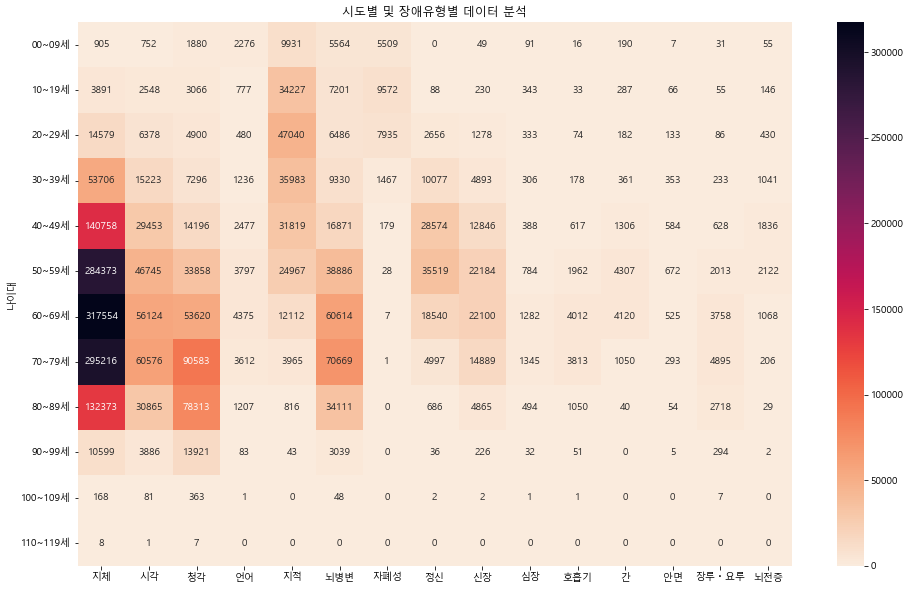

In [39]:
# 히트맵 작성
plt.figure(figsize=(16,10))
sns.heatmap(df_age_cut2, annot=True, fmt='.0f', cmap='rocket_r')
plt.title('시도별 및 장애유형별 데이터 분석')
plt.show()

# 정제한 데이터프레임 저장

In [40]:
# 시도 및 장애유형별 장애인 데이터
#df_pivot.to_csv('C:/DEV/STUDY/miniproject/data/정제데이터/sido_type.csv')

In [41]:
# 시도별 전동휠체어 및 스쿠터 필요, 소지 현황
#df_cut_total.to_csv('C:/DEV/STUDY/miniproject/data/정제데이터/status_type.csv')

In [42]:
# 연령대 및 장애유형별 장애인 데이터
#df_age_cut2.to_csv('C:/DEV/STUDY/miniproject/data/정제데이터/age_type.csv')

# 시도별 전동휠체어 및 스쿠터 필요,  소지 현황(수정)

In [43]:
# file_path = 'C:/DEV/STUDY/miniproject/data/정제데이터/status_type.csv'
# df = pd.read_csv(file_path)
# df

In [44]:
# df['필요(명)'] = df['필요_전동휠체어(명)'] + df['필요_전동스쿠터(명)']
# df

In [45]:
# df['소지(명)'] = df['소지_전동휠체어(명)'] + df['소지_전동스쿠터(명)']
# df

In [46]:
# df = df[['시도별', '필요(명)', '소지(명)', '계']]
# df

In [47]:
# 시도별 전동휠체어 및 스쿠터 필요, 소지 현황(수정)
#df.to_csv('C:/DEV/STUDY/miniproject/data/정제데이터/status_type(new).csv')

# 시군구별 장애인 데이터

In [48]:
# 파일 불러오기
file_path = './원본데이터/장애유형별_장애인_성_시군구별__20220623100240.csv'
df = pd.read_csv(file_path, 
                 encoding = 'euc-kr',
                 header = 1)
df

,시군구별,장애유형별,전체
0,전국,지체,1254130
1,전국,뇌병변,252819
2,서울특별시,지체,185424
3,서울특별시,뇌병변,42287
4,종로구,지체,2853
...,...,...,...
489,제주특별자치도,뇌병변,3528
490,제주시,지체,9958
491,제주시,뇌병변,2483
492,서귀포시,지체,4788


In [49]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    494 non-null    object
 1   장애유형별   494 non-null    object
 2   전체      494 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.7+ KB


In [50]:
# 이상치 확인
df.describe()

,전체
count,4.940000e+02
mean,9.151512e+03
std,5.996433e+04
min,5.100000e+01
25%,8.747500e+02
50%,2.118500e+03
75%,5.329250e+03
max,1.254130e+06


In [51]:
# 중복값 확인
df[df.duplicated()]

,시군구별,장애유형별,전체
166,세종특별자치시,지체,5296
167,세종특별자치시,뇌병변,935


In [52]:
# 시군별로 그룹하여 지체 및 뇌병변 장애인 총 수 데이터 프레임 작성
df_total = df.groupby('시군구별')[['전체']].sum()
df_total

,전체
시군구별,
가평군,2825
강남구,8571
강동구,10204
강릉시,7977
강북구,10085
...,...
홍천군,3005
화성시,15165
화순군,2811


In [53]:
# 소지 및 필요 비율 가져오기
rate_df_re = rate_df.groupby('필요 및 소지별')['비율(%)'].sum()
rate_df_re

필요 및 소지별
소지     6.7
필요    14.7
Name: 비율(%), dtype: float64

In [54]:
# 소지 및 필요 값 계산하여 컬럼추가
df_total['소지'] = round(df_total['전체'] * rate_df_re[0] / 100)
df_total['필요'] = round(df_total['전체'] * rate_df_re[1] / 100)
df_total

,전체,소지,필요
시군구별,,,
가평군,2825,189.0,415.0
강남구,8571,574.0,1260.0
강동구,10204,684.0,1500.0
강릉시,7977,534.0,1173.0
강북구,10085,676.0,1482.0
...,...,...,...
홍천군,3005,201.0,442.0
화성시,15165,1016.0,2229.0
화순군,2811,188.0,413.0


In [55]:
# 시군구별 필요 및 소지 데이터
#df_total.to_csv('C:/DEV/STUDY/miniproject/data/정제데이터/status_type(siguungoo).csv')